# Numpy Basics




NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
fonte: https://numpy.org/

In [2]:
import numpy as np
import math

At the core of the NumPy package, is the ndarray object. This encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance. 

Transformando uma lista e um array

In [4]:
la=np.array([1,3,4,5])
la

array([1, 3, 4, 5])

Diferente das listas, um slice em um array não gera uma cópia...assim o slice é uma "view" do array original. Vamos a um exemplo:

In [6]:
lb=la[:2]
print(lb)
la[0]=42
la,lb



[1 3]


(array([42,  3,  4,  5]), array([42,  3]))

Um array n-dimensional (bi-dimensional, por exemplo) pode ser criado também a partir de uma lista..vamos a um exemplo..

In [8]:
m=[[1,2],[3,9]]
ma=np.array(m)
ma

array([[1, 2],
       [3, 9]])

A indexação no array é feita por vírgulas. Exemplo, para acessar o elemento de índices 1,1 , podemos usar a[1,1], sendo a o array...exemplos.

In [13]:
ma[1,1],ma[:,0],ma[1,:]


(array([[ 1,  2],
        [90,  9]]), array([ 1, 90]))

Produto interno entre dois vetores (de mesma dimensão) x (x1,x2,x3...,xn) e y (y1,y2,y3,..,yn) é dado por: x1y1+x2y2+x3y3+...+xnyn
O produto interno entre x e y é simbolizado por &lsaquo;x,y&rsaquo;

As duas listas lx e ly abaixo representam dois vetores x e y. Obtenha o produto interno deles (inner)

In [18]:
lx=[1.0,5.5,7.0]
ly=[0.0,1.5,-3.0]
x=np.array(lx)
y=np.array(ly)
inner=0
for i in range(len(x)):
    inner+=x[i]*y[i]

inner

-12.75

Agora vamos usar o numpy para obter o produto interno...

In [15]:
x=np.array(lx)
y=np.array(ly)
print('prod. interno ',np.inner(x,y))

prod. interno  -12.75


Vamos obter a norma Euclidiana de um vetor x...ela é dada por raiz(&lsaquo;x,x&rsaquo;). É o "módulo do vetor".
Exemplo, o vetor 4,3 tem norma 5...(Pitágoras..ah vá)...vamos obter a norma dele com numpy.

In [19]:
x=np.array((3,4))
math.sqrt(np.inner(x,x))

5.0

In [20]:
x=np.array((3,4))
np.linalg.norm(x)

5.0

O cosseno entre dois vetores x e y é dado por &lsaquo;x,y&rsaquo; /||x||.||y||  ||v|| é o módulo do vetor v
Vamos fazer pela definição 

In [21]:
x=np.array((3,3))
y=np.array((5,5))
cos=np.inner(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cos

1.0

O cosseno pode ser uma medida de similaridade entre dois vetores. Primeiro vamos criar a função cosseno, que recebe dois vetores e devolve um número emtre -1 e 1

In [22]:
def cosseno(x,y):
    return np.inner(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosseno(x,y)

1.0

A lista luser1, luser2 e luser3 mostra se esses usuários gostaram ou não dos filmes 0,1,2,3,4,5...
Descubra quem é mais similar user1 e user2, user2 e user3 ou user1 e user3

In [28]:
luser1=np.array([1,1,0,0,1])
luser2=np.array([0,1,0,0,1])
luser3=np.array([1,1,1,0,1])
LU=np.array([luser1,luser2,luser3])
sim12=cosseno(luser1,luser2)
sim13=cosseno(luser1,luser3)
sim23=cosseno(luser2,luser3)
sim12,sim13,sim23

(0.8164965809277259, 0.8660254037844387, 0.7071067811865475)

Com um critério de similaridade entre vetores definido (cos, por exemplo), podemos criar uma matriz de similaridade. É uma matriz simétrica onde o elemento i,j é a similaridade entre os usuários(vetores) i e j. Na diagonal principal, obviamente, só há 1's.Vamos criar a matriz de similaridade para luser1,2 e 3.Partiremos de uma matriz identidade e usaremos a simetria.

In [29]:
WC=np.identity((3)) 
l,c=WC.shape
for i in range(l):
    for j in range(c):
        if i<j:WC[i,j]=cosseno(LU[i],LU[j])
        elif i>j:WC[i,j]=WC[j,i]
WC

array([[1.        , 0.81649658, 0.8660254 ],
       [0.81649658, 1.        , 0.70710678],
       [0.8660254 , 0.70710678, 1.        ]])

Se multiplicarmos WC por LU, cada linha da matriz Resultante REC trará a "intensidade" da recomendação de cada filme para o usuário correspondente. Obviamente, temos que não considerar os filme já vistos. Esse algoritmo se chama: Collaborative Filtering User Based. Vamos obter com np.dot(WC,LU) o produto das suas matrizes.Qual filme você recomendaria para cada usuário?

In [30]:
REC=np.dot(WC,LU)
REC

array([[1.8660254 , 2.68252198, 0.8660254 , 0.        , 2.68252198],
       [1.52360336, 2.52360336, 0.70710678, 0.        , 2.52360336],
       [1.8660254 , 2.57313218, 1.        , 0.        , 2.57313218]])

Vamos obter automaticamente, o id do filme a ser recomendado. Inicialmente vamos trocar os zeros por 1´s e vice versa na matriz LU. Depois multiplicaremos 1 a 1 os elementos de LU e REC....Finalmente, pegaremos o índice com np.argmax(), que devolve o índice de maior valor no vetor. 

In [33]:
LU2=-1*(LU-1)
print(LU2)

[[0 0 1 1 0]
 [1 0 1 1 0]
 [0 0 0 1 0]]


In [34]:
REC2=REC*LU2 
REC2

array([[0.        , 0.        , 0.8660254 , 0.        , 0.        ],
       [1.52360336, 0.        , 0.70710678, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [38]:
lrec=[(np.argmax(REC2[i]),REC2[i,np.argmax(REC2[i])]) for i in range(len(REC2))]
lrec

[(2, 0.8660254037844387), (0, 1.5236033621142733), (0, 0.0)]

Com numpy, podemos fazer coisas simples como multiplicar um escalar por um vetor...

In [39]:
x=np.array([1,2,3,4])
x=3*x
x

array([ 3,  6,  9, 12])

Somar vetores

In [45]:
x=np.array([1,2,3,4])
y=np.ones((4,)) #tente com (4,1)
x+y

array([2., 3., 4., 5.])

Vamos criar uma matriz, partindo de uma lista de linhas

In [46]:
m=np.array([[1,2,3],[3,5,0],[1,0,3]])
m

array([[1, 2, 3],
       [3, 5, 0],
       [1, 0, 3]])

Vamos obter a transposta de m "na mão"

In [47]:
lin,col=m.shape
mt=np.zeros((lin,col))
for i in range(lin):
    for j in range(col):
        mt[i,j]=m[j,i]
mt

array([[1., 3., 1.],
       [2., 5., 0.],
       [3., 0., 3.]])

In [48]:
mt=m.T
mt=m.transpose()
mt

array([[1, 3, 1],
       [2, 5, 0],
       [3, 0, 3]])

Podemos fazer, com numpy, várias operações que envolvem matrizes...soma, multiplicação...etc

In [49]:
m1=np.array([[1,2],[2,8]])
m2=np.array([[0,1],[5,2]])

In [46]:
print(m1+m2)

[[ 1  3]
 [ 7 10]]


In [50]:
print(m1*m2) #eis a pegadinha..esse produto multiplica 1 a 1 os elementos das matrizes

[[ 0  2]
 [10 16]]


In [51]:
print(np.dot(m1,m2)) #Agora sim...o produto de duas matrizes

[[10  5]
 [40 18]]


Podemos também (quando possível) inverter uma matriz

In [53]:
m1_inv=np.linalg.inv(m1)
print(m1)
print(m1_inv)

[[1 2]
 [2 8]]
[[ 2.   -0.5 ]
 [-0.5   0.25]]


Mostre que m1_inv é de fato a inversa de m1...

In [54]:
np.dot(m1_inv,m1)

array([[1., 0.],
       [0., 1.]])

Resolva o sistema de equações lineares abaixo com numpy<br/>
3x+y=10<br/>
x-y=-2

In [55]:
A=np.array([[3,1],[1,-1]])
b=np.array([10,-2])
Ainv=np.linalg.inv(A)
x=np.dot(Ainv,b)
x


array([2., 4.])

Mudar o formato de vetores é algo também usual com numpy. Por exemplo, uma imagem pode ser transformada em um vetor unidimensional para ser passada para uma função.Vamos abrir a foto do link e transformála em vetor...mostramos a primeira linha da foto e o vetor.

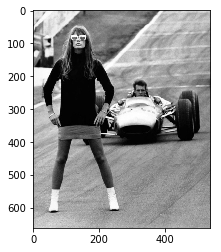

In [59]:
img=plt.imread('http://www.linkededucation.com.br/dsipt/formula1.png')
plt.imshow(img)
plt.show()

In [79]:
print(img.shape)
img2=img[:,:,0].copy()
w,h=img2.shape
vet=img2.reshape((w*h,))
vet[:10],img2[0,:10]

(662, 540, 4)


(array([0.8509804 , 0.85490197, 0.87058824, 0.89411765, 0.9019608 ,
        0.8901961 , 0.8862745 , 0.8862745 , 0.8980392 , 0.9098039 ],
       dtype=float32),
 array([0.8509804 , 0.85490197, 0.87058824, 0.89411765, 0.9019608 ,
        0.8901961 , 0.8862745 , 0.8862745 , 0.8980392 , 0.9098039 ],
       dtype=float32))

Vamos criar um perceptron (?) com numpy. O perceptron receberá os pesos, o bias, os inputs e a função ativadora (note que passamos a função como parâmetro no percepron)
...e devolverá o output...com vários perceptrons ligados, criamos uma rede neural

In [56]:
def sig(x):
    return 1/(1+math.exp(-x))

def perceptron(w,input,fativ):
    i2=np.array([1]+input)
    w=np.array(w)
    somat=np.inner(w,i2)
    return fativ(somat)  

    

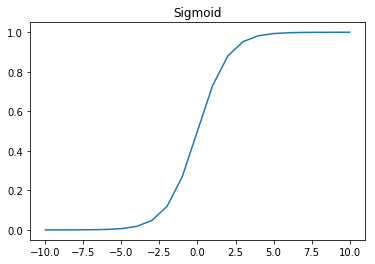

In [57]:
import matplotlib.pyplot as plt
lx=[i for i in range(-10,11)]
ly=[sig(v) for v in lx]
plt.plot(lx,ly)
plt.title('Sigmoid')
plt.show()

In [67]:

input=[16,40]
w1=[-13.23,1.35,-0.144]
w2=[-53.9,3.62,0.022]
w3=[52.471,7.04,10.21]
o1=perceptron(w1,input,sig)
o2=perceptron(w2,input,sig)
o3=perceptron(w3,[o1,o2],lambda x:x)
print('Corolla 20'+str(input[0])+' km '+str(input[1])+' Valor (R$x1000):'+str(o3))

Corolla 2016 km 40 Valor (R$x1000):69.1633092327


Agora vamos pegar os pesos da rede neural da planilha corolla e gerar a rede